In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
from mlxtend.preprocessing import minmax_scaling

In [82]:
initial = pd.read_excel(r"data\\191022_Areas1-7.xlsx",sheet_name='191022_Area1_file01', header=0) # index_col = 0
initial

baseline    wave_01    wave_02    wave_03    wave_04    wave_05  \
0    32846.297  32982.445  33032.375  32959.250  33001.668  33000.422   
1    32842.215  33074.027  33130.891  32992.352  33028.074  33033.352   
2    32845.934  33047.930  33085.668  33025.418  33027.449  33040.270   
3    32857.578  33030.766  33101.281  33047.785  33025.520  33030.277   
4    32842.379  33053.254  33116.555  33038.617  33047.004  33056.000   
..         ...        ...        ...        ...        ...        ...   
195  32841.141  33000.562  33060.527  33012.551  33010.285  33004.109   
196  32841.125  33003.000  33059.816  33003.145  33020.281  33002.203   
197  32831.430  32988.875  33060.953  33018.238  33023.809  33018.715   
198  32834.445  32988.602  33051.281  33021.750  33031.746  33012.512   
199  32853.461  32997.211  33062.855  33015.477  33020.559  33002.758   

       wave_06    wave_07    wave_08    wave_09  ...   wave_209   wave_210  \
0    33091.547  33152.734  33047.629  32947.098  ...  33177.488  33135.418   
1    33119.387  33462.113  33026.922  33180.422  ...  33156.156  33141.109   
2    33117.754  33332.820  33043.223  33230.812  ...  33163.090  33164.188   
3    33121.340  33306.172  33067.336  33304.668  ...  33141.266  33162.793   
4    33126.121  33259.918  33055.727  33301.488  ...  33133.590  33130.793   
..         ...        ...        ...        ...  ...        ...        ...   
195  33062.055  33108.848  33111.180  33053.121  ...  33165.812  33213.746   
196  33047.867  33110.211  33089.203  33073.402  ...  33177.023  33206.672   
197  33058.445  33129.031  33094.660  33032.500  ...  33160.168  33250.945   
198  33061.941  33091.672  33115.883  33004.148  ...  33182.523  33196.934   
199  33040.234  33108.688  33092.707  33051.152  ...  33151.543  33229.145   

      wave_211   wave_212   wave_213   wave_214   wave_215   wave_216  \
0    33396.445  33001.648  33171.391  33251.223  33136.805  32959.672   
1    33379.043  32994.086  33229.000  33267.715  33117.043  33009.406   
2    33360.617  33009.027  33301.312  33243.184  33086.523  33023.918   
3    33366.680  32991.016  33351.324  33250.766  33129.523  32997.203   
4    33300.680  32993.109  33357.609  33259.559  33111.086  33001.652   
..         ...        ...        ...        ...        ...        ...   
195  33358.488  33020.258  33390.668  33236.145  33163.305  32989.816   
196  33347.789  33012.496  33388.543  33211.391  33182.371  32986.164   
197  33310.129  32999.469  33392.828  33182.207  33153.129  32985.266   
198  33310.617  33025.922  33409.762  33213.105  33197.043  32980.551   
199  33294.598  33035.793  33377.703  33194.844  33181.371  32972.672   

      wave_217   wave_218  
0    33014.211  33118.734  
1    33029.355  33147.586  
2    33034.473  33184.266  
3    33067.043  33145.375  
4    33051.410  33183.895  
..         ...        ...  
195  33092.102  33206.320  
196  33095.828  33148.762  
197  33125.551  33163.348  
198  33098.602  33169.199  
199  33092.445  33163.039  

[200 rows x 219 columns]

In [83]:
n = frameToSecDF(initial.sub(initial['baseline'], axis = 'rows').drop('baseline', axis = 1).T)
n

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01     136.148    231.812    201.996    173.188    210.875    198.004   
wave_02     186.078    288.676    239.734    243.703    274.176    268.770   
wave_03     112.953    150.137    179.484    190.207    196.238    245.430   
wave_04     155.371    185.859    181.515    167.942    204.625    195.895   
wave_05     154.125    191.137    194.336    172.699    213.621    206.922   
...             ...        ...        ...        ...        ...        ...   
wave_214    404.926    425.500    397.250    393.188    417.180    439.516   
wave_215    290.508    274.828    240.589    271.945    268.707    300.254   
wave_216    113.375    167.191    177.984    139.625    159.273    175.934   
wave_217    167.914    187.140    188.539    209.465    209.031    225.609   
wave_218    272.437    305.371    338.332    287.797    341.516    321.992   

          2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01     181.137    170.789    202.148    206.387  ...    163.023   
wave_02     261.051    257.425    254.652    266.910  ...    217.312   
wave_03     227.731    242.691    283.152    304.254  ...    175.055   
wave_04     186.700    169.265    200.675    199.125  ...    170.590   
wave_05     232.688    190.484    205.918    223.351  ...    185.441   
...             ...        ...        ...        ...  ...        ...   
wave_214    415.110    385.957    423.800    460.601  ...    364.852   
wave_215    281.137    246.777    274.339    267.777  ...    351.613   
wave_216    158.102    118.613    154.742    165.844  ...    158.883   
wave_217    217.676    207.132    242.839    246.312  ...    254.637   
wave_218    357.891    332.972    387.175    389.523  ...    345.344   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01     169.472    159.293    134.871    168.859    159.421    161.875   
wave_02     233.976    226.957    216.484    228.230    219.386    218.691   
wave_03     170.160    186.028    154.777    188.800    171.410    162.020   
wave_04     198.347    202.395    180.019    193.203    169.144    179.156   
wave_05     184.058    176.891    173.554    195.824    162.968    161.078   
...             ...        ...        ...        ...        ...        ...   
wave_214    361.972    376.067    366.086    369.117    395.004    370.266   
wave_215    394.789    301.922    346.105    329.847    322.164    341.246   
wave_216    156.793    154.368    134.414    154.230    148.675    145.039   
wave_217    257.722    255.930    245.211    267.703    250.961    254.703   
wave_218    364.918    380.305    328.500    360.121    365.179    307.637   

          73.782772  74.157303  74.531835  
wave_01     157.445    154.157    143.750  
wave_02     229.523    216.836    209.394  
wave_03     186.808    187.305    162.016  
wave_04     192.379    197.301    167.098  
wave_05     187.285    178.067    149.297  
...             ...        ...        ...  
wave_214    350.777    378.660    341.383  
wave_215    321.699    362.598    327.910  
wave_216    153.836    146.106    119.211  
wave_217    294.121    264.157    238.984  
wave_218    331.918    334.754    309.578  

[218 rows x 200 columns]

<IPython.core.display.Javascript object>


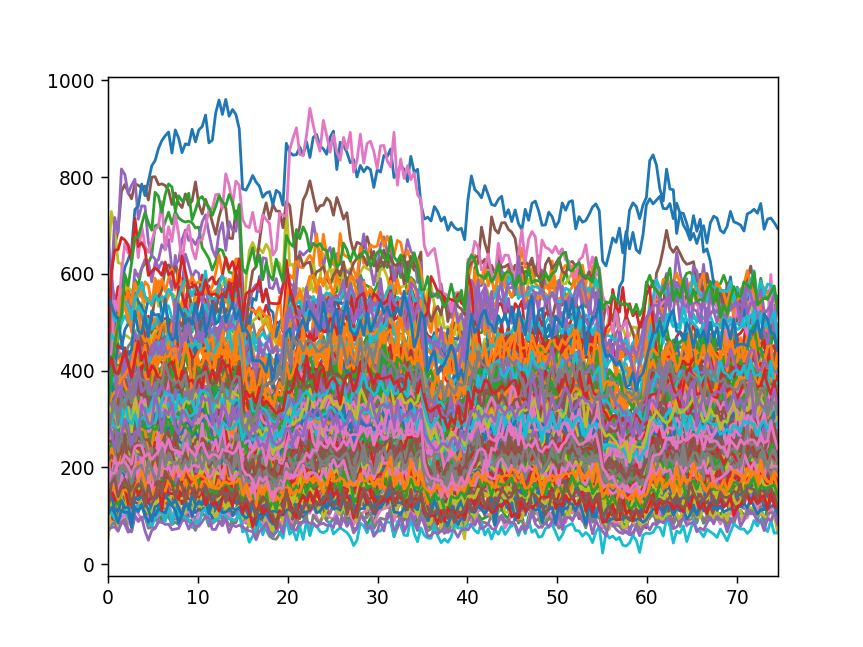

In [84]:
n.T.plot(legend=False)

<IPython.core.display.Javascript object>


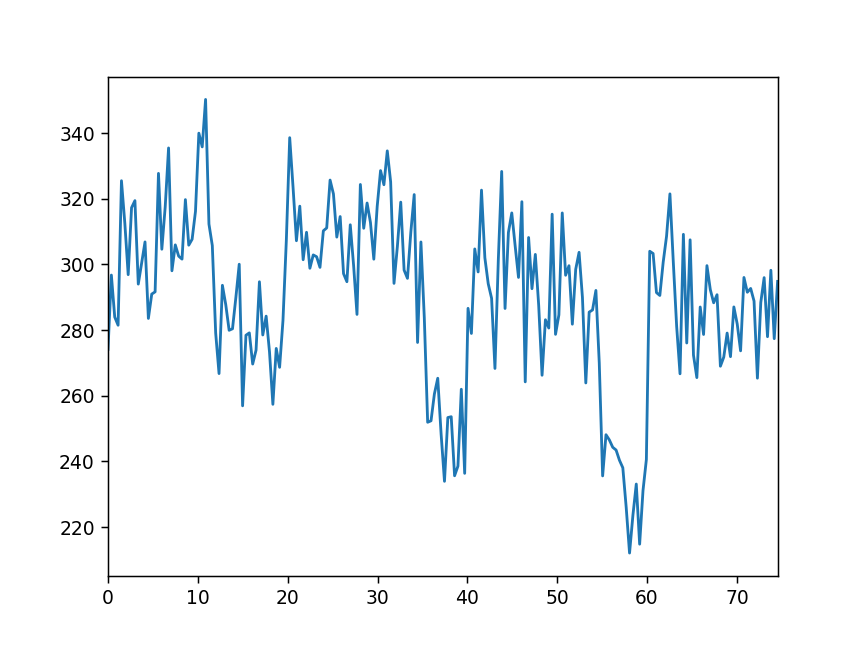

In [85]:
%matplotlib notebook
n.T['wave_200'].plot()

# Removal

In [86]:
a = [a - b > 70 for a, b in zip(list(n.max(axis = 1)), list(n.min(axis= 0)))]
dropped = []
for i in range(len(a)):
    if not a[i]:
        dropped.append(list(n.T)[i])
dropped

['wave_85', 'wave_123', 'wave_167', 'wave_168', 'wave_190', 'wave_195']

In [87]:
n = n.drop(dropped, axis = 0)
n

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01     136.148    231.812    201.996    173.188    210.875    198.004   
wave_02     186.078    288.676    239.734    243.703    274.176    268.770   
wave_03     112.953    150.137    179.484    190.207    196.238    245.430   
wave_04     155.371    185.859    181.515    167.942    204.625    195.895   
wave_05     154.125    191.137    194.336    172.699    213.621    206.922   
...             ...        ...        ...        ...        ...        ...   
wave_214    404.926    425.500    397.250    393.188    417.180    439.516   
wave_215    290.508    274.828    240.589    271.945    268.707    300.254   
wave_216    113.375    167.191    177.984    139.625    159.273    175.934   
wave_217    167.914    187.140    188.539    209.465    209.031    225.609   
wave_218    272.437    305.371    338.332    287.797    341.516    321.992   

          2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01     181.137    170.789    202.148    206.387  ...    163.023   
wave_02     261.051    257.425    254.652    266.910  ...    217.312   
wave_03     227.731    242.691    283.152    304.254  ...    175.055   
wave_04     186.700    169.265    200.675    199.125  ...    170.590   
wave_05     232.688    190.484    205.918    223.351  ...    185.441   
...             ...        ...        ...        ...  ...        ...   
wave_214    415.110    385.957    423.800    460.601  ...    364.852   
wave_215    281.137    246.777    274.339    267.777  ...    351.613   
wave_216    158.102    118.613    154.742    165.844  ...    158.883   
wave_217    217.676    207.132    242.839    246.312  ...    254.637   
wave_218    357.891    332.972    387.175    389.523  ...    345.344   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01     169.472    159.293    134.871    168.859    159.421    161.875   
wave_02     233.976    226.957    216.484    228.230    219.386    218.691   
wave_03     170.160    186.028    154.777    188.800    171.410    162.020   
wave_04     198.347    202.395    180.019    193.203    169.144    179.156   
wave_05     184.058    176.891    173.554    195.824    162.968    161.078   
...             ...        ...        ...        ...        ...        ...   
wave_214    361.972    376.067    366.086    369.117    395.004    370.266   
wave_215    394.789    301.922    346.105    329.847    322.164    341.246   
wave_216    156.793    154.368    134.414    154.230    148.675    145.039   
wave_217    257.722    255.930    245.211    267.703    250.961    254.703   
wave_218    364.918    380.305    328.500    360.121    365.179    307.637   

          73.782772  74.157303  74.531835  
wave_01     157.445    154.157    143.750  
wave_02     229.523    216.836    209.394  
wave_03     186.808    187.305    162.016  
wave_04     192.379    197.301    167.098  
wave_05     187.285    178.067    149.297  
...             ...        ...        ...  
wave_214    350.777    378.660    341.383  
wave_215    321.699    362.598    327.910  
wave_216    153.836    146.106    119.211  
wave_217    294.121    264.157    238.984  
wave_218    331.918    334.754    309.578  

[212 rows x 200 columns]

# -1 1 scaling

In [116]:
def oneneg(n, last):
    last = n[n.columns[-last:]]
    last = last.mean(axis=1)
    ne = n.sub(last, axis = 0)
    n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
    return n_one

In [94]:
last = n[n.columns[-15:]]
last

69.288390  69.662921  70.037453  70.411985  70.786517  71.161049  \
wave_01     155.738    163.968    160.821    154.804    161.492    163.023   
wave_02     214.957    223.972    222.168    229.426    213.090    217.312   
wave_03     176.683    163.195    166.696    158.992    161.563    175.055   
wave_04     179.269    190.379    189.407    178.883    185.188    170.590   
wave_05     182.586    180.691    174.504    162.914    166.969    185.441   
...             ...        ...        ...        ...        ...        ...   
wave_214    364.015    360.109    343.176    357.508    377.156    364.852   
wave_215    329.922    355.992    324.969    344.058    317.727    351.613   
wave_216    141.957    151.551    144.696    166.234    125.199    158.883   
wave_217    256.226    247.625    238.817    257.742    247.652    254.637   
wave_218    368.832    360.086    360.899    373.203    379.793    345.344   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01     169.472    159.293    134.871    168.859    159.421    161.875   
wave_02     233.976    226.957    216.484    228.230    219.386    218.691   
wave_03     170.160    186.028    154.777    188.800    171.410    162.020   
wave_04     198.347    202.395    180.019    193.203    169.144    179.156   
wave_05     184.058    176.891    173.554    195.824    162.968    161.078   
...             ...        ...        ...        ...        ...        ...   
wave_214    361.972    376.067    366.086    369.117    395.004    370.266   
wave_215    394.789    301.922    346.105    329.847    322.164    341.246   
wave_216    156.793    154.368    134.414    154.230    148.675    145.039   
wave_217    257.722    255.930    245.211    267.703    250.961    254.703   
wave_218    364.918    380.305    328.500    360.121    365.179    307.637   

          73.782772  74.157303  74.531835  
wave_01     157.445    154.157    143.750  
wave_02     229.523    216.836    209.394  
wave_03     186.808    187.305    162.016  
wave_04     192.379    197.301    167.098  
wave_05     187.285    178.067    149.297  
...             ...        ...        ...  
wave_214    350.777    378.660    341.383  
wave_215    321.699    362.598    327.910  
wave_216    153.836    146.106    119.211  
wave_217    294.121    264.157    238.984  
wave_218    331.918    334.754    309.578  

[212 rows x 15 columns]

In [97]:
last = last.mean(axis=1)
last

wave_01     157.932600
wave_02     221.360133
wave_03     171.433867
wave_04     184.850533
wave_05     174.808467
               ...    
wave_214    365.076533
wave_215    338.170733
wave_216    146.746133
wave_217    255.479400
wave_218    351.404467
Length: 212, dtype: float64

In [102]:
ne = n.sub(last, axis = 0)
ne

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01  -21.784600  73.879400  44.063400  15.255400  52.942400  40.071400   
wave_02  -35.282133  67.315867  18.373867  22.342867  52.815867  47.409867   
wave_03  -58.480867 -21.296867   8.050133  18.773133  24.804133  73.996133   
wave_04  -29.479533   1.008467  -3.335533 -16.908533  19.774467  11.044467   
wave_05  -20.683467  16.328533  19.527533  -2.109467  38.812533  32.113533   
...             ...        ...        ...        ...        ...        ...   
wave_214  39.849467  60.423467  32.173467  28.111467  52.103467  74.439467   
wave_215 -47.662733 -63.342733 -97.581733 -66.225733 -69.463733 -37.916733   
wave_216 -33.371133  20.444867  31.237867  -7.121133  12.526867  29.187867   
wave_217 -87.565400 -68.339400 -66.940400 -46.014400 -46.448400 -29.870400   
wave_218 -78.967467 -46.033467 -13.072467 -63.607467  -9.888467 -29.412467   

          2.247191   2.621723    2.996255    3.370787   ...  71.161049  \
wave_01   23.204400  12.856400   44.215400   48.454400  ...   5.090400   
wave_02   39.690867  36.064867   33.291867   45.549867  ...  -4.048133   
wave_03   56.297133  71.257133  111.718133  132.820133  ...   3.621133   
wave_04    1.849467 -15.585533   15.824467   14.274467  ... -14.260533   
wave_05   57.879533  15.675533   31.109533   48.542533  ...  10.632533   
...             ...        ...         ...         ...  ...        ...   
wave_214  50.033467  20.880467   58.723467   95.524467  ...  -0.224533   
wave_215 -57.033733 -91.393733  -63.831733  -70.393733  ...  13.442267   
wave_216  11.355867 -28.133133    7.995867   19.097867  ...  12.136867   
wave_217 -37.803400 -48.347400  -12.640400   -9.167400  ...  -0.842400   
wave_218   6.486533 -18.432467   35.770533   38.118533  ...  -6.060467   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01   11.539400   1.360400 -23.061600  10.926400   1.488400   3.942400   
wave_02   12.615867   5.596867  -4.876133   6.869867  -1.974133  -2.669133   
wave_03   -1.273867  14.594133 -16.656867  17.366133  -0.023867  -9.413867   
wave_04   13.496467  17.544467  -4.831533   8.352467 -15.706533  -5.694533   
wave_05    9.249533   2.082533  -1.254467  21.015533 -11.840467 -13.730467   
...             ...        ...        ...        ...        ...        ...   
wave_214  -3.104533  10.990467   1.009467   4.040467  29.927467   5.189467   
wave_215  56.618267 -36.248733   7.934267  -8.323733 -16.006733   3.075267   
wave_216  10.046867   7.621867 -12.332133   7.483867   1.928867  -1.707133   
wave_217   2.242600   0.450600 -10.268400  12.223600  -4.518400  -0.776400   
wave_218  13.513533  28.900533 -22.904467   8.716533  13.774533 -43.767467   

          73.782772  74.157303  74.531835  
wave_01   -0.487600  -3.775600 -14.182600  
wave_02    8.162867  -4.524133 -11.966133  
wave_03   15.374133  15.871133  -9.417867  
wave_04    7.528467  12.450467 -17.752533  
wave_05   12.476533   3.258533 -25.511467  
...             ...        ...        ...  
wave_214 -14.299533  13.583467 -23.693533  
wave_215 -16.471733  24.427267 -10.260733  
wave_216   7.089867  -0.640133 -27.535133  
wave_217  38.641600   8.677600 -16.495400  
wave_218 -19.486467 -16.650467 -41.826467  

[212 rows x 200 columns]

In [113]:
n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
n_one

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01   -0.294867   1.000000   0.596423   0.206491   0.716606   0.542389   
wave_02   -0.524128   1.000000   0.272950   0.331911   0.784598   0.704290   
wave_03   -0.357266  -0.130105   0.049179   0.114687   0.151531   0.452050   
wave_04   -0.540725   0.018498  -0.061182  -0.310143   0.362711   0.202582   
wave_05   -0.357354   0.282112   0.337382  -0.036446   0.670574   0.554834   
...             ...        ...        ...        ...        ...        ...   
wave_214   0.417165   0.632544   0.336809   0.294286   0.545446   0.779271   
wave_215  -0.466072  -0.619400  -0.954207  -0.647591  -0.679254  -0.370770   
wave_216  -0.458218   0.280728   0.428926  -0.097780   0.172006   0.400777   
wave_217  -0.709018  -0.553345  -0.542017  -0.372579  -0.376093  -0.241861   
wave_218  -0.628649  -0.366466  -0.104068  -0.506370  -0.078721  -0.234149   

          2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01    0.314085   0.174019   0.598481   0.655858  ...   0.068901   
wave_02    0.589621   0.535756   0.494562   0.676659  ...  -0.060136   
wave_03    0.343925   0.435317   0.682498   0.811412  ...   0.022122   
wave_04    0.033924  -0.285876   0.290258   0.261828  ...  -0.261572   
wave_05    1.000000   0.270830   0.537488   0.838682  ...   0.183701   
...             ...        ...        ...        ...  ...        ...   
wave_214   0.523776   0.218588   0.614748   1.000000  ...  -0.002351   
wave_215  -0.557707  -0.893697  -0.624181  -0.688348  ...   0.131446   
wave_216   0.155927  -0.386295   0.109791   0.262232  ...   0.166651   
wave_217  -0.306094  -0.391469  -0.102349  -0.074229  ...  -0.006821   
wave_218   0.051638  -0.146738   0.284764   0.303456  ...  -0.048247   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01    0.156192   0.018414  -0.312152   0.147895   0.020146   0.053363   
wave_02    0.187413   0.083143  -0.072437   0.102054  -0.029326  -0.039651   
wave_03   -0.007782   0.089157  -0.101759   0.106092  -0.000146  -0.057510   
wave_04    0.247557   0.321807  -0.088622   0.153204  -0.288095  -0.104451   
wave_05    0.159807   0.035980  -0.021674   0.363091  -0.204571  -0.237225   
...             ...        ...        ...        ...        ...        ...   
wave_214  -0.032500   0.115054   0.010568   0.042298   0.313296   0.054326   
wave_215   0.553644  -0.354460   0.077586  -0.081394  -0.156523   0.030072   
wave_216   0.137953   0.104656  -0.169332   0.102761   0.026485  -0.023441   
wave_217   0.018158   0.003649  -0.083143   0.098975  -0.036586  -0.006287   
wave_218   0.107579   0.230073  -0.182339   0.069391   0.109657  -0.348427   

          73.782772  74.157303  74.531835  
wave_01   -0.006600  -0.051105  -0.191970  
wave_02    0.121262  -0.067208  -0.177761  
wave_03    0.093922   0.096958  -0.057535  
wave_04    0.138090   0.228371  -0.325624  
wave_05    0.215560   0.056299  -0.440768  
...             ...        ...        ...  
wave_214  -0.149695   0.142199  -0.248036  
wave_215  -0.161070   0.238863  -0.100335  
wave_216   0.097351  -0.008790  -0.378084  
wave_217   0.312881   0.070263  -0.133563  
wave_218  -0.155129  -0.132552  -0.332975  

[212 rows x 200 columns]

<IPython.core.display.Javascript object>


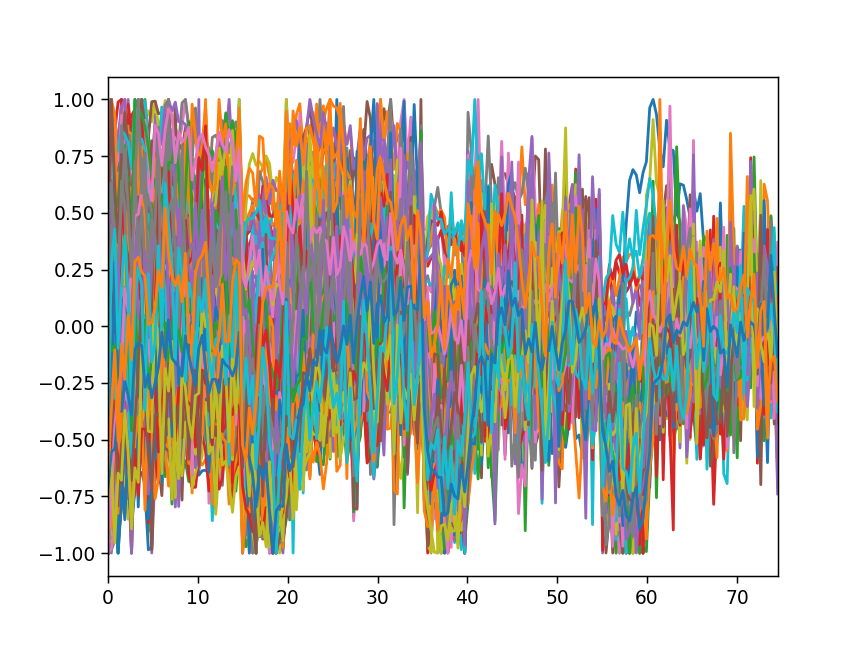

In [115]:
n_one.T.plot(legend=False)

<IPython.core.display.Javascript object>


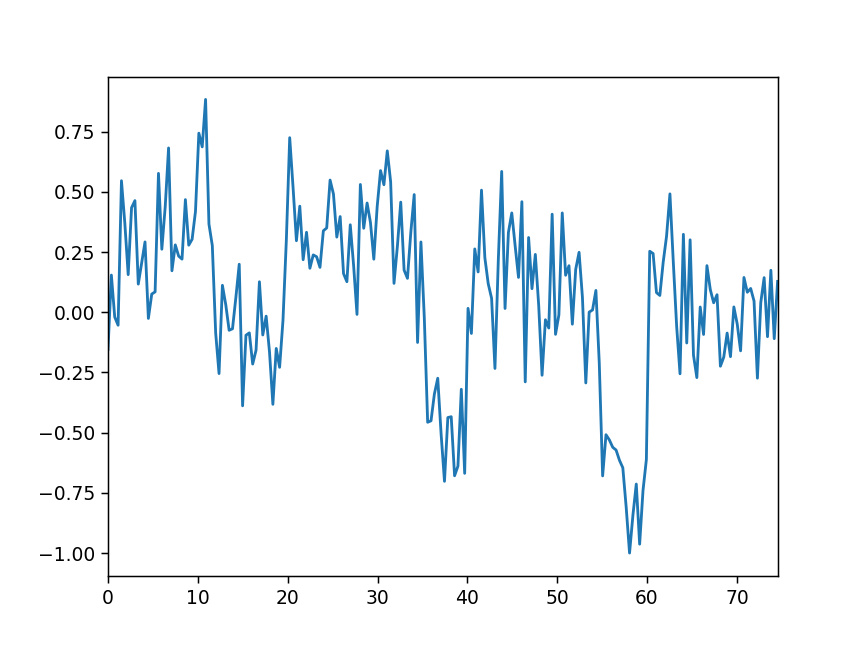

In [137]:
%matplotlib notebook
n_one.T['wave_200'].plot()

# minmax scaling

<IPython.core.display.Javascript object>


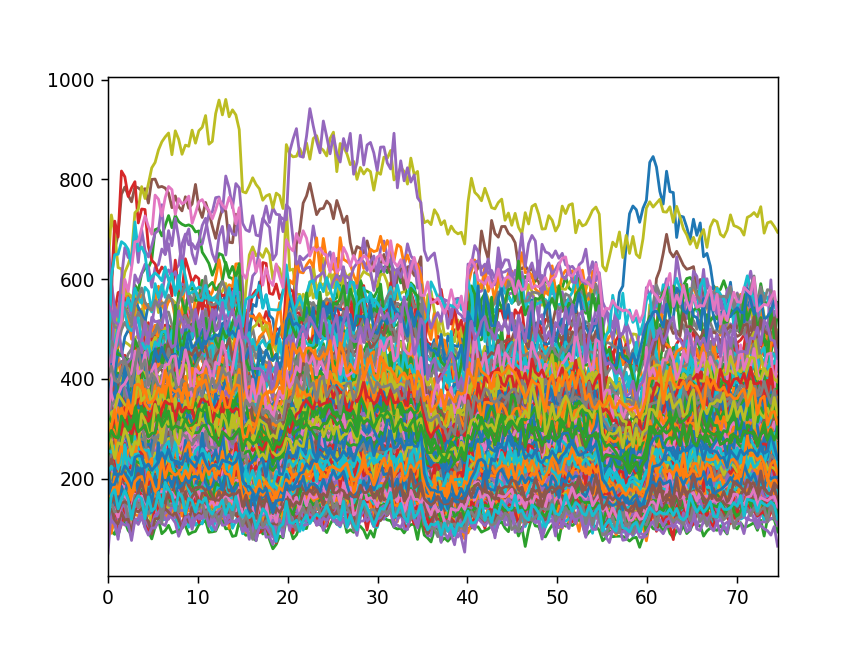

In [51]:
n.T.plot(legend=False)

<IPython.core.display.Javascript object>


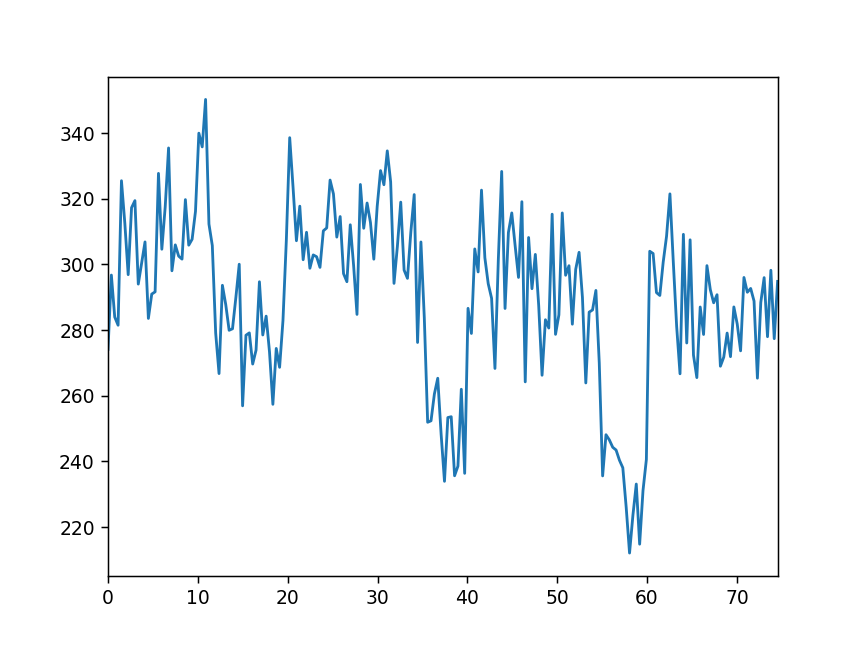

In [53]:
%matplotlib notebook
n.T['wave_200'].plot()

In [54]:
n

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01     136.148    231.812    201.996    173.188    210.875    198.004   
wave_02     186.078    288.676    239.734    243.703    274.176    268.770   
wave_03     112.953    150.137    179.484    190.207    196.238    245.430   
wave_04     155.371    185.859    181.515    167.942    204.625    195.895   
wave_05     154.125    191.137    194.336    172.699    213.621    206.922   
...             ...        ...        ...        ...        ...        ...   
wave_214    404.926    425.500    397.250    393.188    417.180    439.516   
wave_215    290.508    274.828    240.589    271.945    268.707    300.254   
wave_216    113.375    167.191    177.984    139.625    159.273    175.934   
wave_217    167.914    187.140    188.539    209.465    209.031    225.609   
wave_218    272.437    305.371    338.332    287.797    341.516    321.992   

          2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01     181.137    170.789    202.148    206.387  ...    163.023   
wave_02     261.051    257.425    254.652    266.910  ...    217.312   
wave_03     227.731    242.691    283.152    304.254  ...    175.055   
wave_04     186.700    169.265    200.675    199.125  ...    170.590   
wave_05     232.688    190.484    205.918    223.351  ...    185.441   
...             ...        ...        ...        ...  ...        ...   
wave_214    415.110    385.957    423.800    460.601  ...    364.852   
wave_215    281.137    246.777    274.339    267.777  ...    351.613   
wave_216    158.102    118.613    154.742    165.844  ...    158.883   
wave_217    217.676    207.132    242.839    246.312  ...    254.637   
wave_218    357.891    332.972    387.175    389.523  ...    345.344   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01     169.472    159.293    134.871    168.859    159.421    161.875   
wave_02     233.976    226.957    216.484    228.230    219.386    218.691   
wave_03     170.160    186.028    154.777    188.800    171.410    162.020   
wave_04     198.347    202.395    180.019    193.203    169.144    179.156   
wave_05     184.058    176.891    173.554    195.824    162.968    161.078   
...             ...        ...        ...        ...        ...        ...   
wave_214    361.972    376.067    366.086    369.117    395.004    370.266   
wave_215    394.789    301.922    346.105    329.847    322.164    341.246   
wave_216    156.793    154.368    134.414    154.230    148.675    145.039   
wave_217    257.722    255.930    245.211    267.703    250.961    254.703   
wave_218    364.918    380.305    328.500    360.121    365.179    307.637   

          73.782772  74.157303  74.531835  
wave_01     157.445    154.157    143.750  
wave_02     229.523    216.836    209.394  
wave_03     186.808    187.305    162.016  
wave_04     192.379    197.301    167.098  
wave_05     187.285    178.067    149.297  
...             ...        ...        ...  
wave_214    350.777    378.660    341.383  
wave_215    321.699    362.598    327.910  
wave_216    153.836    146.106    119.211  
wave_217    294.121    264.157    238.984  
wave_218    331.918    334.754    309.578  

[212 rows x 200 columns]

In [57]:
normcols = list(n.T)
n = minmax_scaling(n.T, columns=normcols).T
n

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01    0.215965   1.000000   0.755637   0.519534   0.828406   0.722919   
wave_02    0.220806   1.000000   0.628304   0.658447   0.889878   0.848821   
wave_03    0.061714   0.218752   0.342692   0.387978   0.413449   0.621199   
wave_04    0.312741   0.693541   0.639284   0.469755   0.927932   0.818893   
wave_05    0.311038   0.635617   0.663670   0.473924   0.832791   0.774044   
...             ...        ...        ...        ...        ...        ...   
wave_214   0.697635   0.809370   0.655948   0.633888   0.764185   0.885490   
wave_215   0.342818   0.244371   0.029402   0.226270   0.205941   0.404008   
wave_216   0.332544   0.786106   0.877069   0.553779   0.719373   0.859792   
wave_217   0.217465   0.333807   0.342273   0.468902   0.466276   0.566594   
wave_218   0.000000   0.160982   0.322096   0.075080   0.337659   0.242226   

          2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01    0.584682   0.499873   0.756882   0.791624  ...   0.436225   
wave_02    0.790198   0.762660   0.741600   0.834695  ...   0.458017   
wave_03    0.546452   0.609632   0.780509   0.869628  ...   0.323987   
wave_04    0.704046   0.486280   0.878596   0.859236  ...   0.502829   
wave_05    1.000000   0.629890   0.765239   0.918119  ...   0.585665   
...             ...        ...        ...        ...  ...        ...   
wave_214   0.752944   0.594617   0.800138   1.000000  ...   0.479998   
wave_215   0.283982   0.068253   0.241301   0.200102  ...   0.726465   
wave_216   0.709503   0.376690   0.681185   0.774753  ...   0.716086   
wave_217   0.518590   0.454785   0.670858   0.691874  ...   0.742251   
wave_218   0.417700   0.295896   0.560841   0.572318  ...   0.356371   

          71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01    0.489079   0.405655   0.205499   0.484055   0.406704   0.426816   
wave_02    0.584574   0.531267   0.451729   0.540935   0.473768   0.468490   
wave_03    0.303314   0.370329   0.238348   0.382036   0.308593   0.268937   
wave_04    0.849519   0.900079   0.620599   0.785269   0.484768   0.609820   
wave_05    0.573537   0.510686   0.481422   0.676719   0.388587   0.372013   
...             ...        ...        ...        ...        ...        ...   
wave_214   0.464357   0.540905   0.486700   0.503161   0.643750   0.509401   
wave_215   0.997545   0.414481   0.691883   0.589808   0.541570   0.661376   
wave_216   0.698471   0.678033   0.509861   0.676870   0.630053   0.599408   
wave_217   0.760920   0.750076   0.685212   0.821317   0.720007   0.742651   
wave_218   0.452049   0.527260   0.274037   0.428601   0.453324   0.172058   

          73.782772  74.157303  74.531835  
wave_01    0.390509   0.363562   0.278269  
wave_02    0.550755   0.454402   0.397883  
wave_03    0.373623   0.375722   0.268920  
wave_04    0.774977   0.836454   0.459213  
wave_05    0.601836   0.520999   0.268699  
...             ...        ...        ...  
wave_214   0.403558   0.554988   0.352541  
wave_215   0.538650   0.795434   0.577646  
wave_216   0.673550   0.608401   0.381730  
wave_217   0.981180   0.799860   0.647530  
wave_218   0.290744   0.304606   0.181546  

[212 rows x 200 columns]

<IPython.core.display.Javascript object>


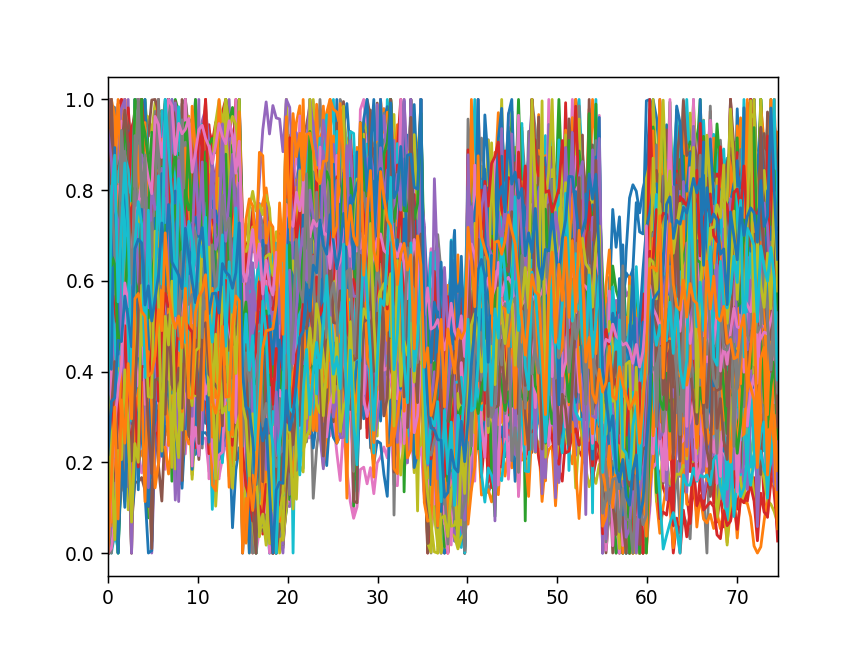

In [58]:
n.T.plot(legend=False)

<IPython.core.display.Javascript object>


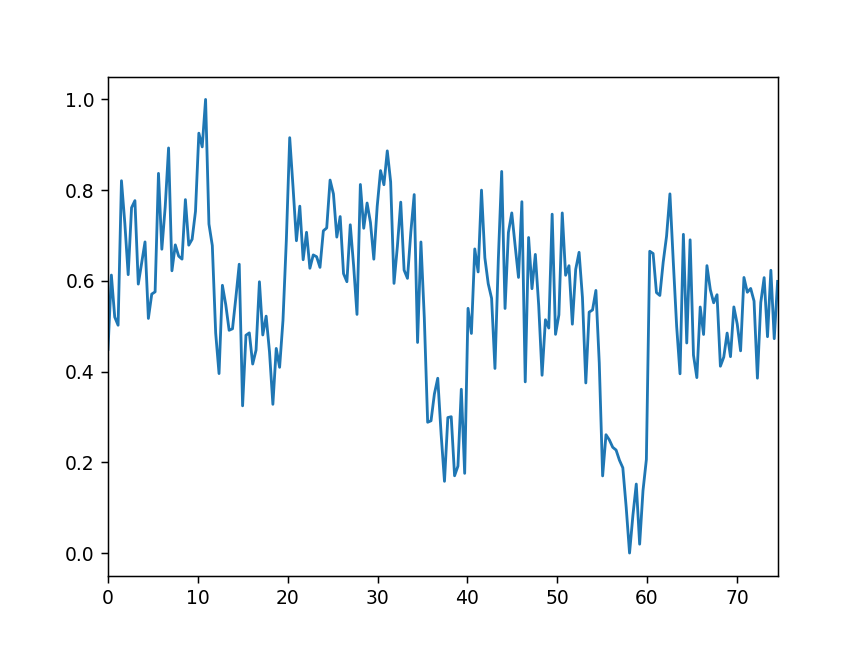

In [59]:
%matplotlib notebook
n.T['wave_200'].plot()

# PCA

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>


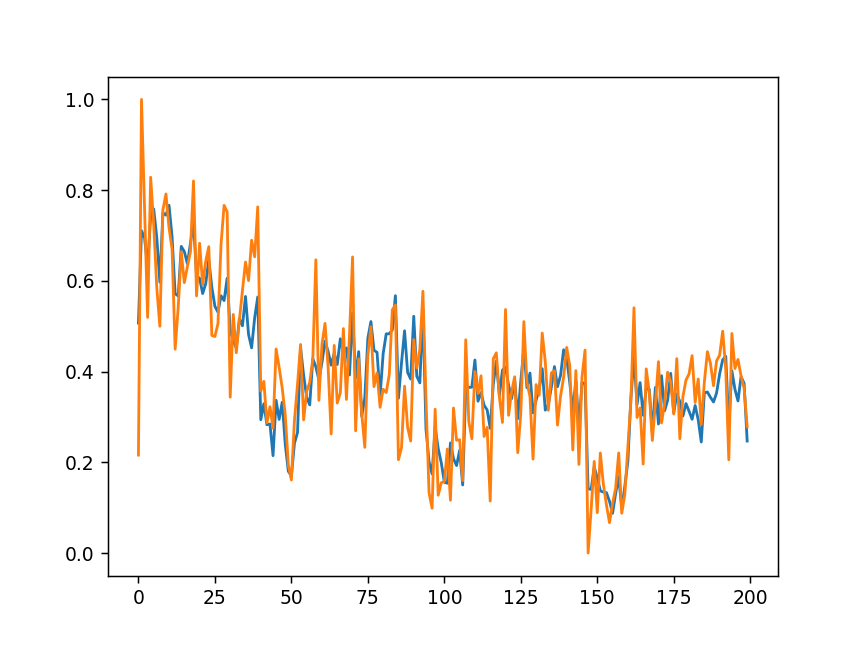

In [61]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(n)
principalDf = pd.DataFrame(data = principalComponents)
p = list(pca.inverse_transform(principalComponents)[0])
b = list(n.iloc[0])
%matplotlib notebook
plt2 = plt.figure()
plt.plot(p)
plt.plot(b)
plt.show()

# DBSCAN

In [62]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [117]:
# choose which n to use
n = n_one

In [163]:
db = DBSCAN(eps=2.8, min_samples=2).fit(n)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dlabels = db.labels_
print(max(dlabels + 1))
dlabels + 1

10


array([ 0,  0,  1,  0,  0,  2,  3,  4,  2,  5,  6,  4,  0,  5,  4,  0,  7,
        8,  0,  0,  0,  7,  4,  8,  0,  0,  4,  9,  4,  0,  4,  0,  0,  9,
        0,  0,  1,  0,  0,  4,  0,  0,  4,  4,  0,  0,  0,  8,  0,  0,  0,
        9,  4,  4,  6,  4,  4,  0,  0,  0,  4,  0,  0,  4,  4,  0,  4,  4,
        0,  8,  0,  0,  4,  0, 10,  0,  0,  4,  2,  2,  0,  0,  4,  0,  0,
        0,  0,  0,  0,  4,  0,  0,  0,  9,  0,  4,  0,  4,  0,  0,  4,  0,
       10,  0,  0,  2,  4,  4,  0,  4,  0,  4,  0,  0,  1,  4,  4,  0,  4,
        0,  0,  0,  4,  0,  0,  4,  2,  0,  0,  0,  4,  0,  0,  0,  0,  0,
        0,  0,  8,  4,  4,  0,  4,  4,  7,  0,  0,  4,  4,  0,  3,  4,  0,
        0,  4,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  4,  0,  4,  0,  9,
        0,  0,  0,  0,  0,  4,  3,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,
        2,  0,  4,  0,  0,  2,  0,  0,  0,  0,  0,  4,  0,  0,  0,  4,  4,
        0,  4,  8,  0,  0,  0,  4,  0], dtype=int32)

In [164]:
data = {'in': list(n.index), 'out': list(dlabels + 1)}
doutdf = pd.DataFrame.from_dict(data)
doutdf

in  out
0     wave_01    0
1     wave_02    0
2     wave_03    1
3     wave_04    0
4     wave_05    0
..        ...  ...
207  wave_214    0
208  wave_215    0
209  wave_216    0
210  wave_217    4
211  wave_218    0

[212 rows x 2 columns]

In [169]:
doutdf.to_csv('tab1clusterings.csv', header=False, index=False)

In [165]:
list(doutdf.loc[doutdf['out'] == 1]['in'])

['wave_03', 'wave_37', 'wave_116']

In [166]:
max(doutdf['out'])

10

In [167]:
n.T[['wave_01', 'wave_02']].T

0.000000   0.374532   0.749064   1.123596   1.498127   1.872659   \
wave_01  -0.294867        1.0   0.596423   0.206491   0.716606   0.542389   
wave_02  -0.524128        1.0   0.272950   0.331911   0.784598   0.704290   

         2.247191   2.621723   2.996255   3.370787   ...  71.161049  \
wave_01   0.314085   0.174019   0.598481   0.655858  ...   0.068901   
wave_02   0.589621   0.535756   0.494562   0.676659  ...  -0.060136   

         71.535581  71.910112  72.284644  72.659176  73.033708  73.408240  \
wave_01   0.156192   0.018414  -0.312152   0.147895   0.020146   0.053363   
wave_02   0.187413   0.083143  -0.072437   0.102054  -0.029326  -0.039651   

         73.782772  74.157303  74.531835  
wave_01  -0.006600  -0.051105  -0.191970  
wave_02   0.121262  -0.067208  -0.177761  

[2 rows x 200 columns]

<IPython.core.display.Javascript object>


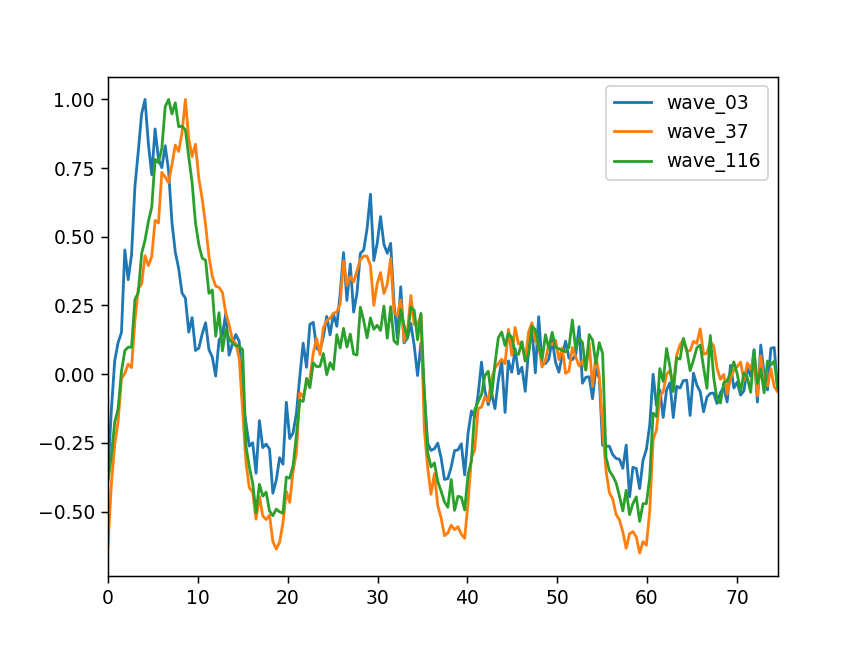

<IPython.core.display.Javascript object>


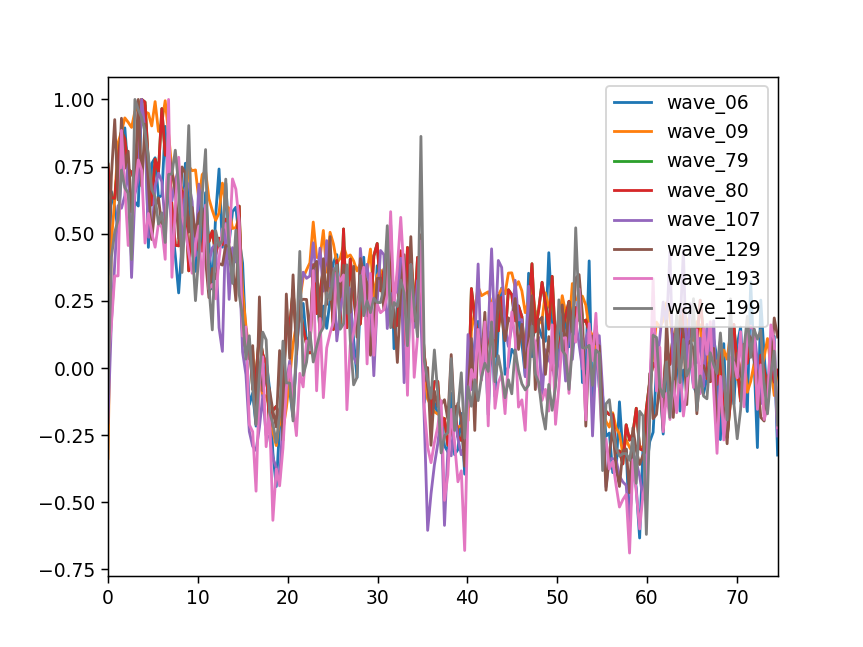

<IPython.core.display.Javascript object>


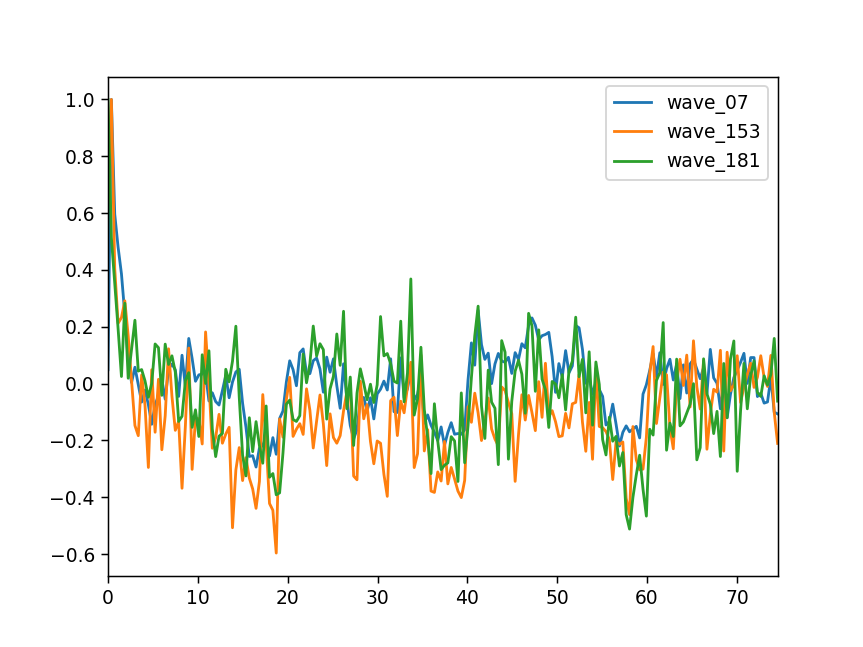

<IPython.core.display.Javascript object>


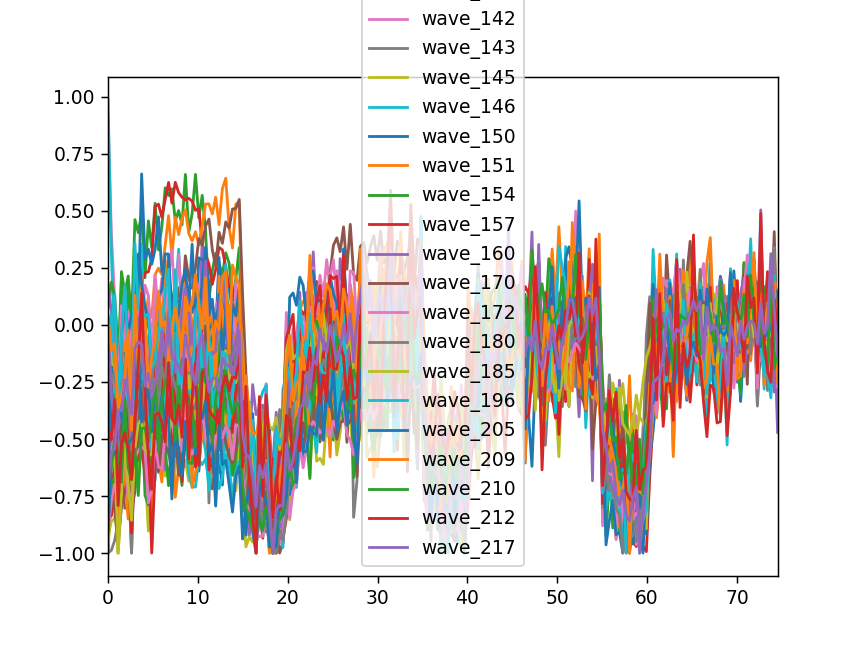

<IPython.core.display.Javascript object>


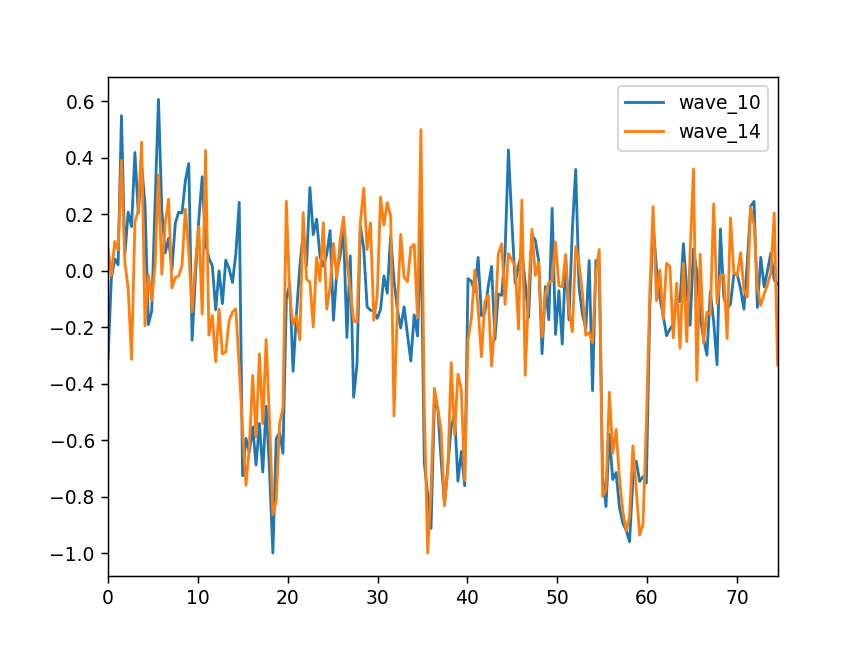

<IPython.core.display.Javascript object>


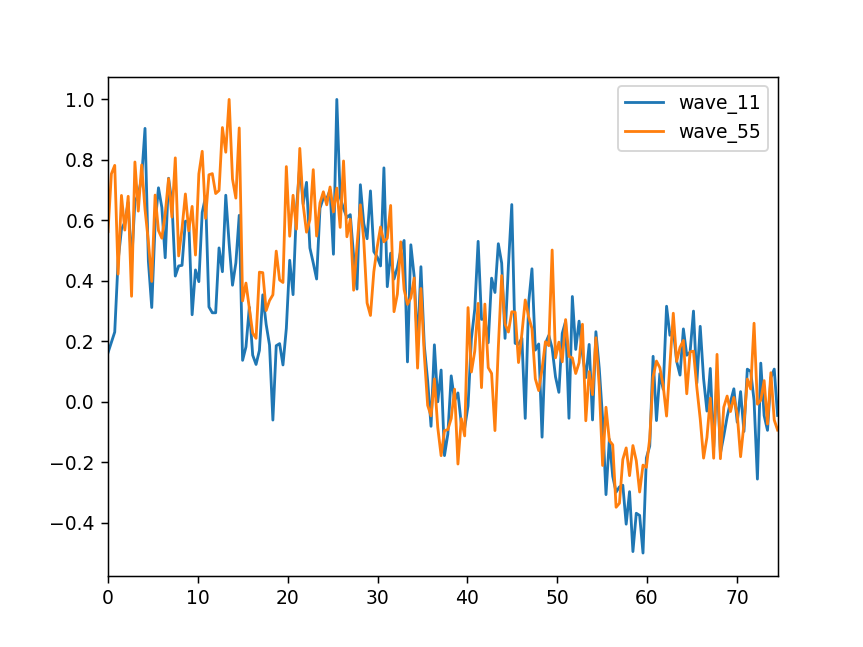

<IPython.core.display.Javascript object>


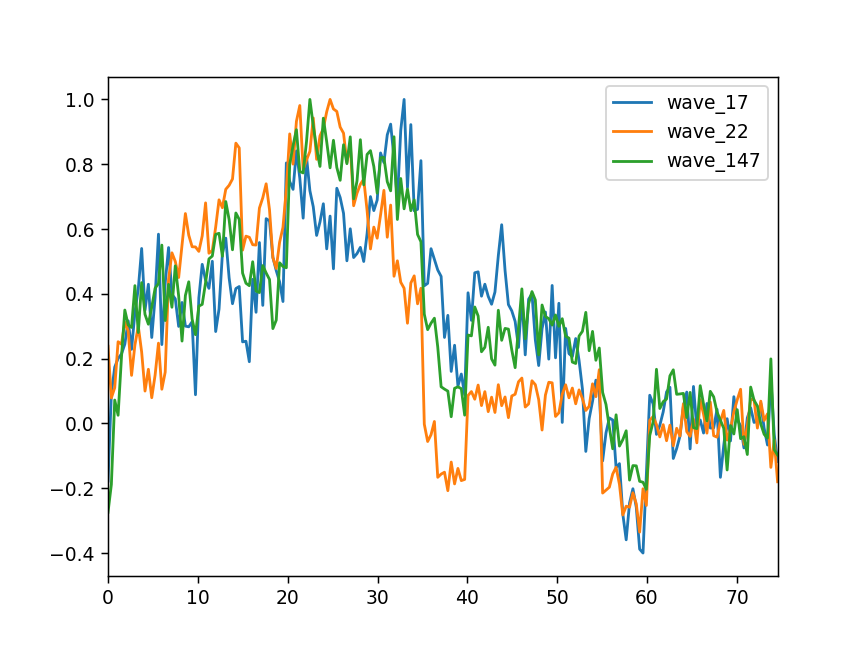

<IPython.core.display.Javascript object>


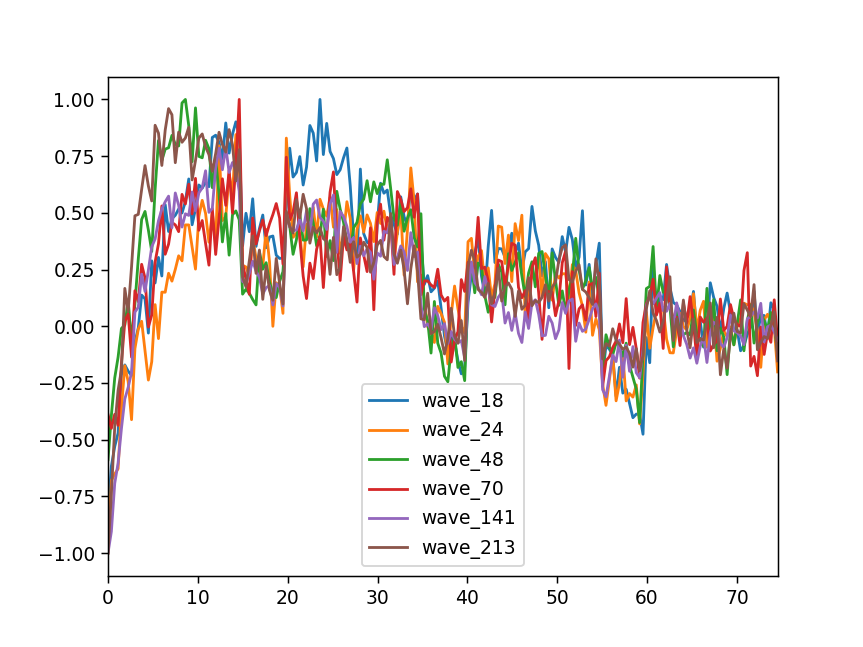

<IPython.core.display.Javascript object>


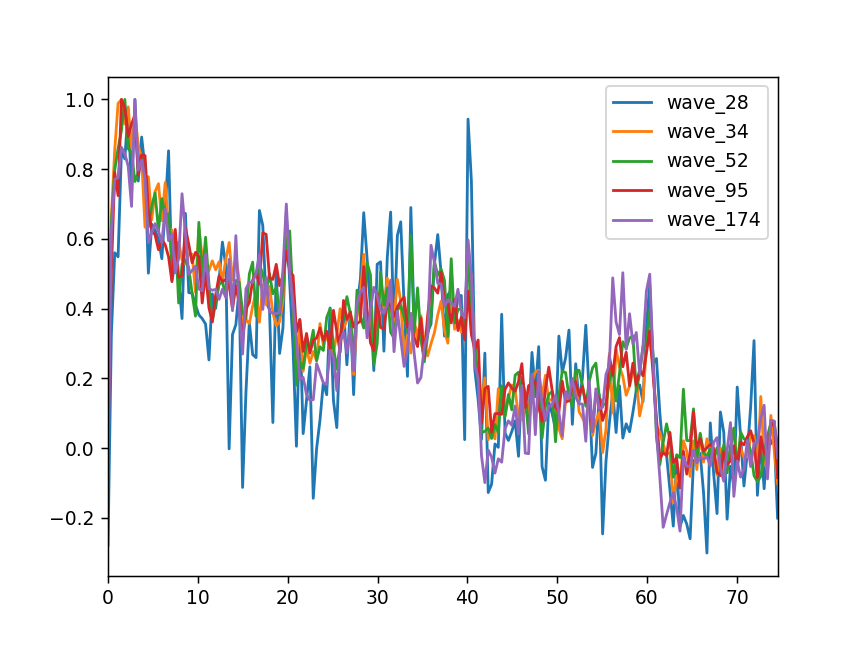

<IPython.core.display.Javascript object>


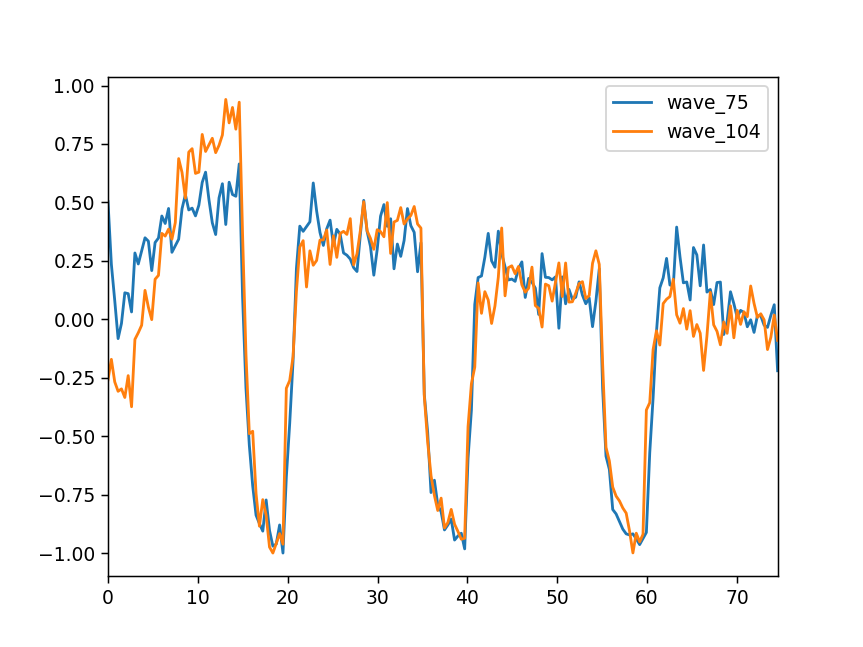

In [168]:
for i in range(1, max(doutdf['out']) + 1):
    z = n.T[list(doutdf.loc[doutdf['out'] == i]['in'])].T
    z.T.plot()

In [80]:
#z = n.T[list(doutdf.loc[doutdf['out'] == 1]['in'])].T
#z.plot(legend=False)

<IPython.core.display.Javascript object>


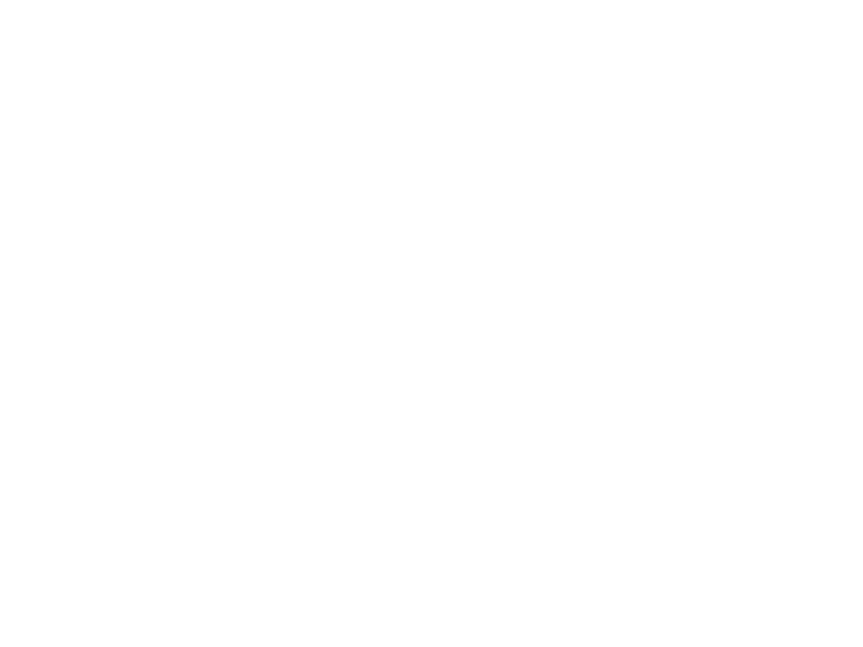

In [18]:
z = n.T[list(doutdf.loc[doutdf['out'] == 2]['in'])].T
z.T.plot(legend=False)

In [19]:
list(doutdf.loc[doutdf['out'] == 2]['in'])

['wave_34', 'wave_52']

<IPython.core.display.Javascript object>


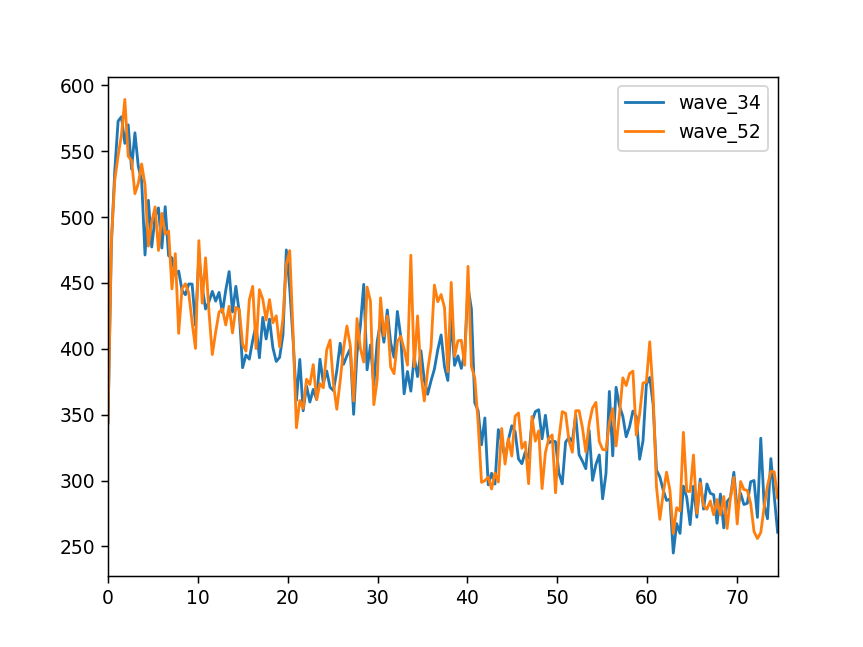

In [20]:
%matplotlib notebook
z = n.T[['wave_34', 'wave_52']].T
z.T.plot()